In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
df = pd.read_csv("C:/data/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
df['Height'].describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [11]:
df[df.Height == 0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [13]:
df1 = df[df.Height != 0]
df1.describe()
df1['Height'].describe()

count    4175.000000
mean        0.139583
std         0.041725
min         0.010000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [17]:
df_corr=df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()


ValueError: could not convert string to float: 'M'

In [19]:
df1.isna().sum() 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole_weight    4175 non-null   float64
 5   Shucked_weight  4175 non-null   float64
 6   Viscera_weight  4175 non-null   float64
 7   Shell_weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


<Figure size 800x600 with 0 Axes>

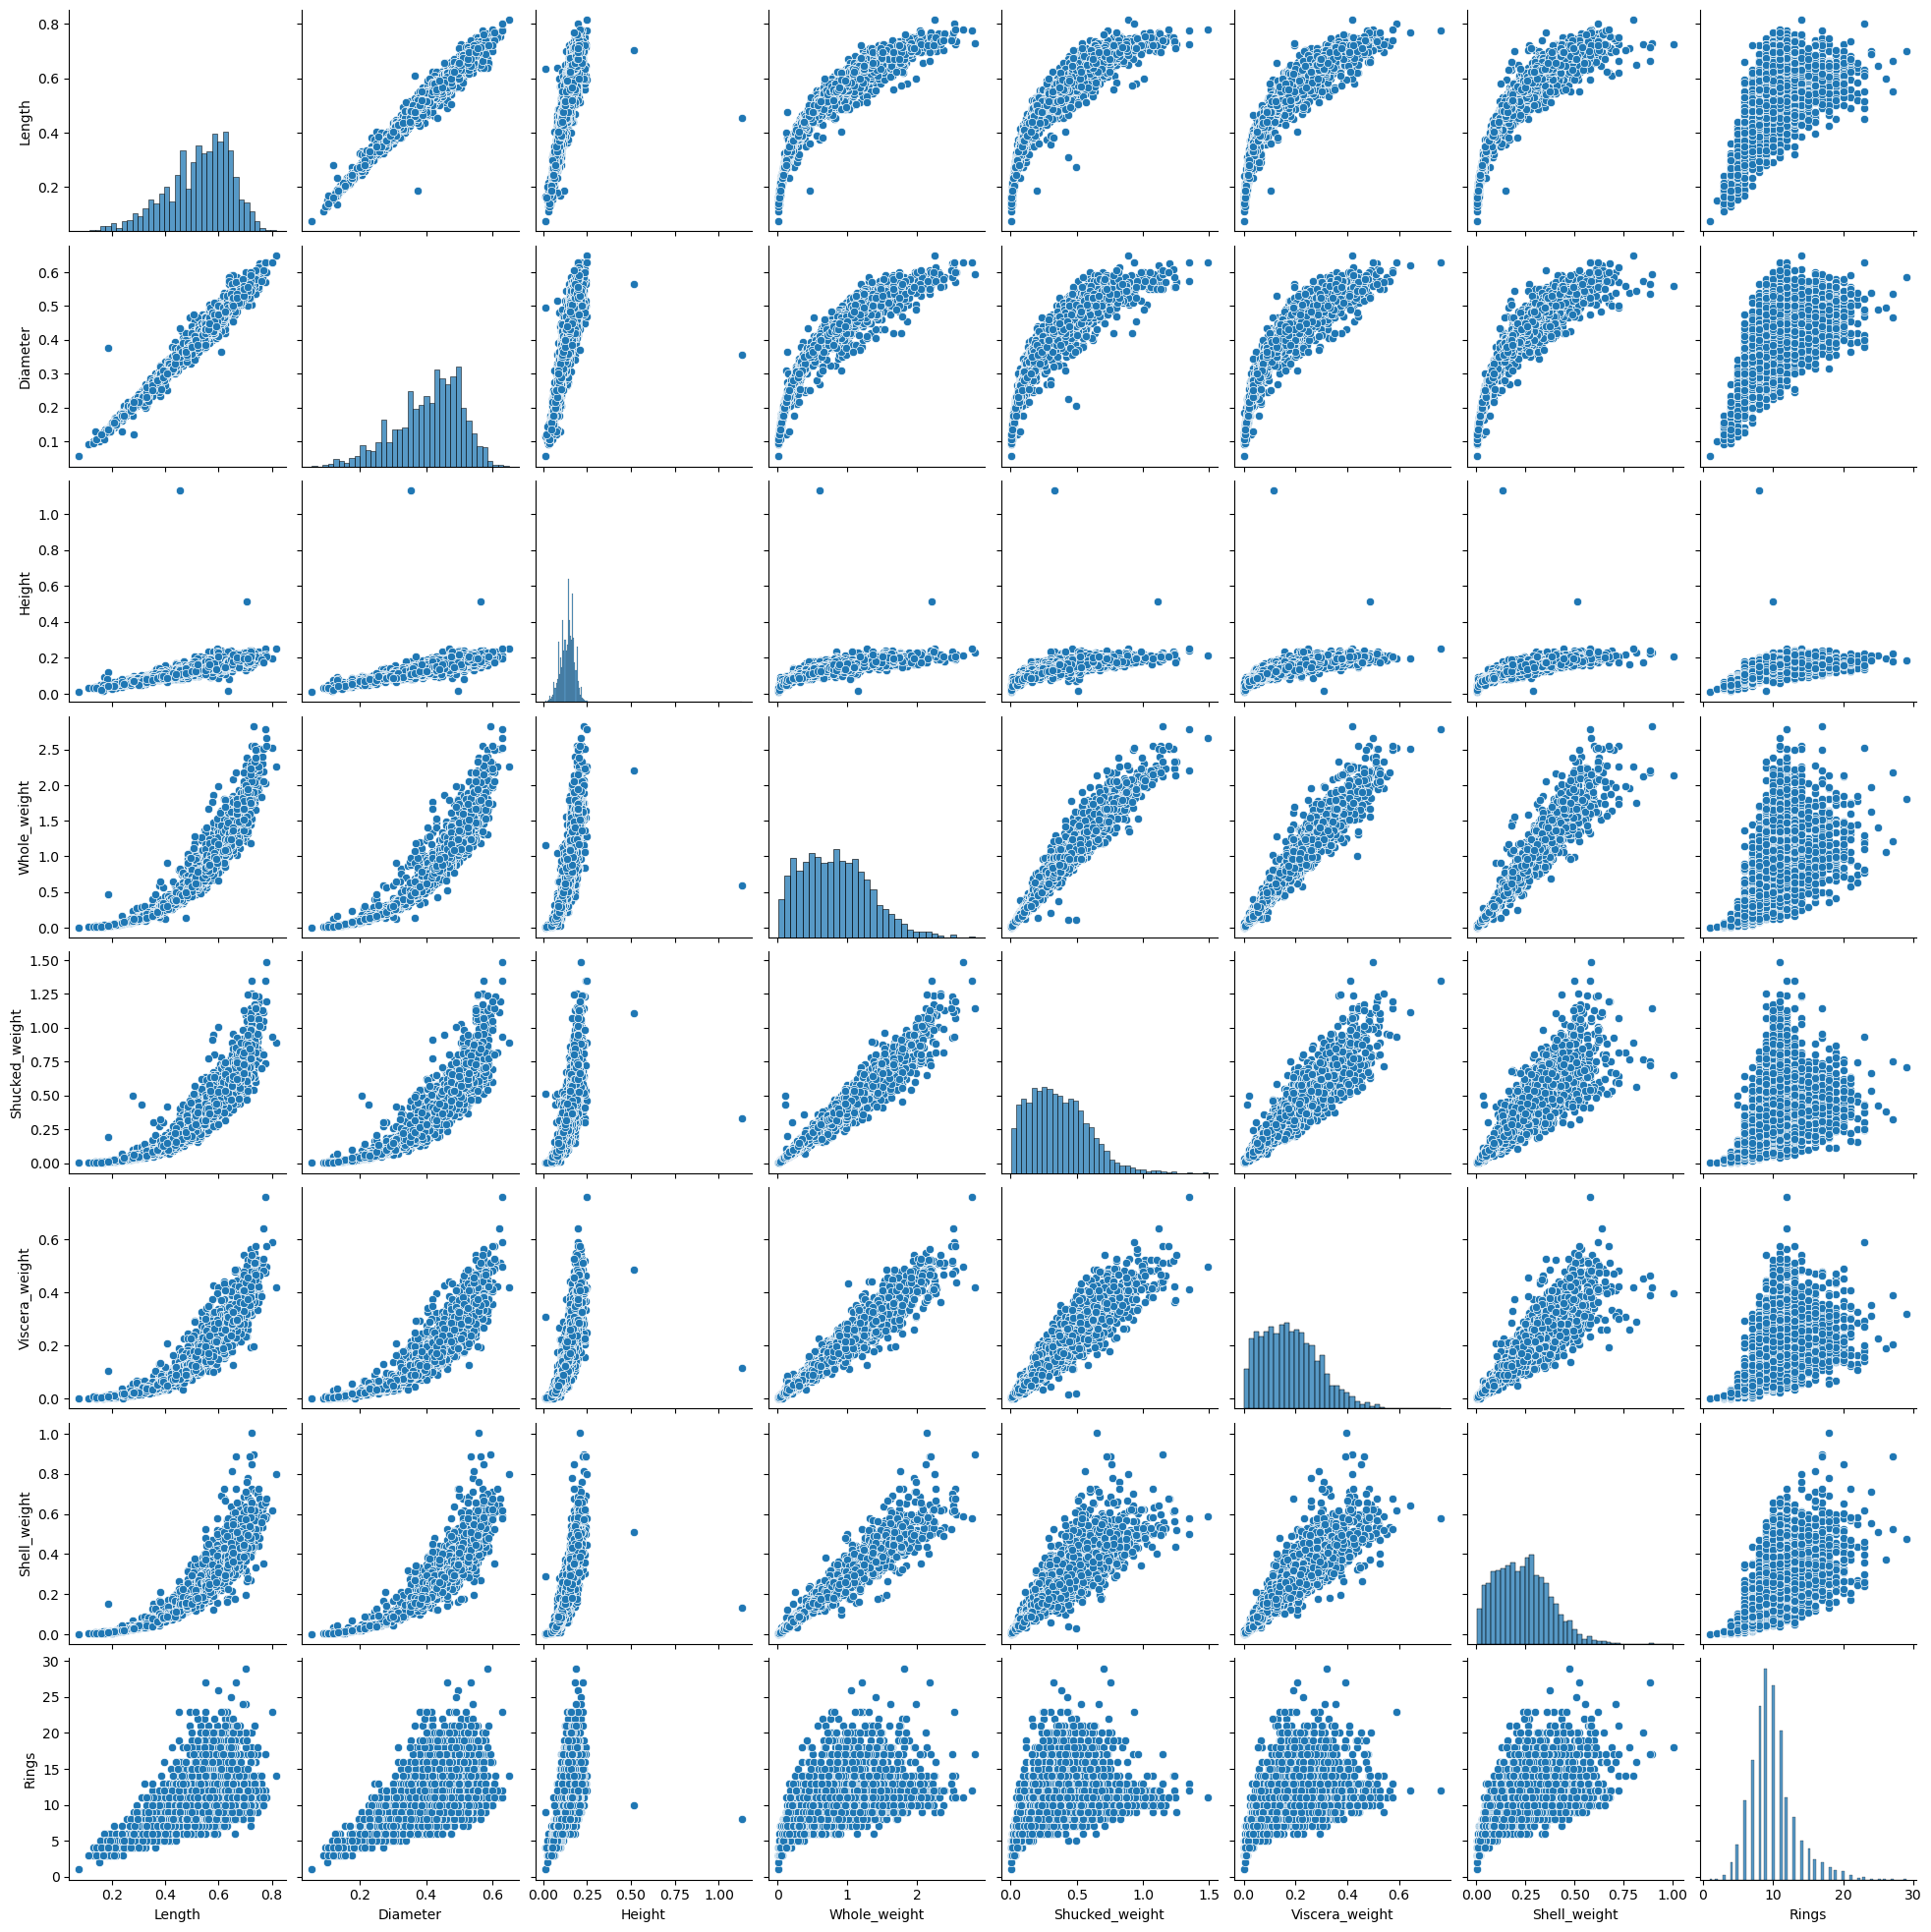

In [23]:
plt.figure(2, figsize = (8, 6))
sns.pairplot(df1)

<Axes: xlabel='count', ylabel='Sex'>

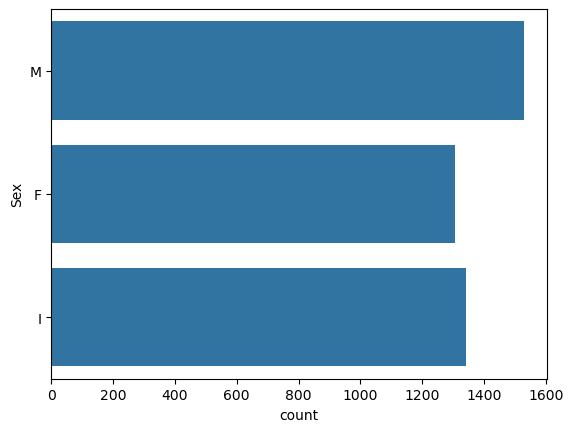

In [25]:
sns.countplot(df1.Sex)

C:\Users\rlfrn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\rlfrn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\rlfrn\anaconda3\Lib\s

<Figure size 1200x1000 with 0 Axes>

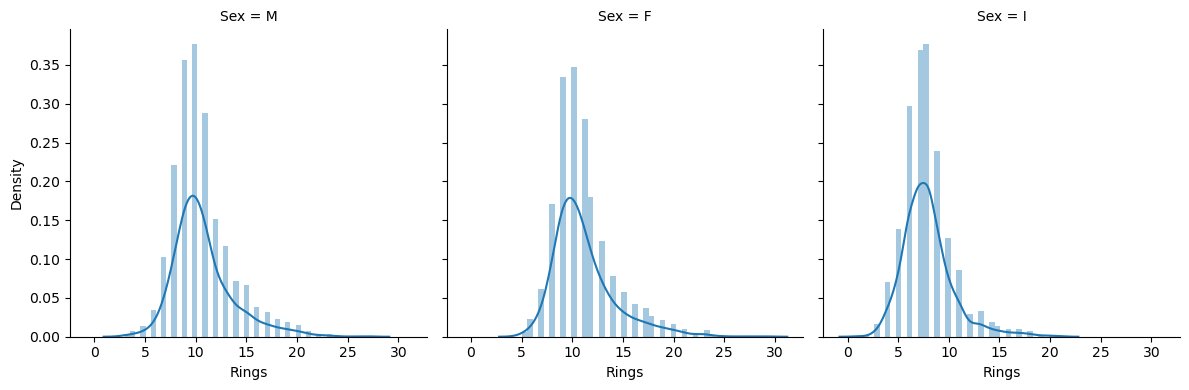

In [27]:
plt.figure(3, figsize=(12, 10))
g = sns.FacetGrid(data = df1, col= 'Sex', height = 4)
g.map(sns.distplot, 'Rings')

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Sex'] = le.fit_transform(df1.Sex)

C:\Users\rlfrn\AppData\Local\Temp\ipykernel_34660\3489617545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sex'] = le.fit_transform(df1.Sex)


C:\Users\rlfrn\AppData\Local\Temp\ipykernel_34660\1785832731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = df1.Rings + 1.5


<Axes: xlabel='id', ylabel='count'>

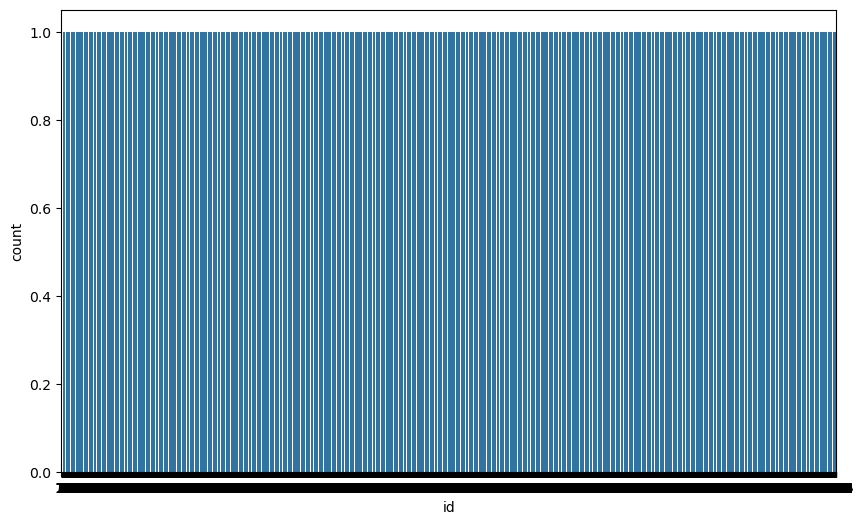

In [31]:
df1['Age'] = df1.Rings + 1.5
df1['Age'].describe()
#lets check the age plot
plt.figure(4, figsize=(10, 6))
sns.countplot(df1['Age'])

Text(0.5, 1.0, 'Rings')

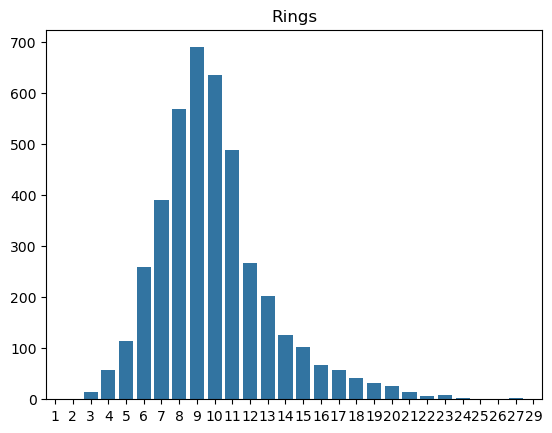

In [33]:
sns.countplot(data = df, x="Rings")
plt.xlabel("")
plt.ylabel("")
plt.title("Rings")

<Axes: xlabel='count', ylabel='AgeIndex'>

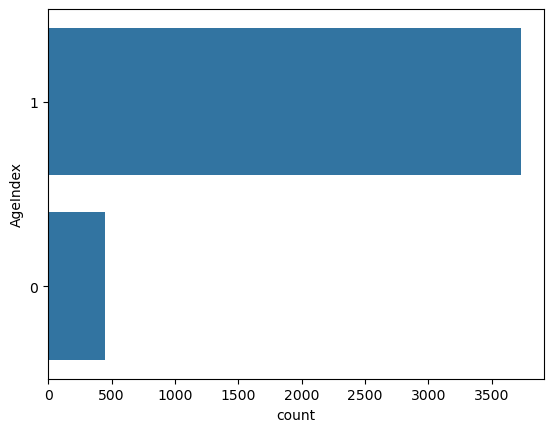

In [35]:
AgeValues = df1['Age'].values
AgeIndex = []
# 0 is young, 1 is old
for age in AgeValues:
    if age <8:
        AgeIndex.append('0')
    else:
        AgeIndex.append('1')

AgeIndex = pd.DataFrame(data = AgeIndex, columns = ['AgeIndex'])
df1.reset_index(drop=True, inplace=True)
AgeIndex.reset_index(drop = True, inplace = True)
newDf = pd.concat([df1, AgeIndex], axis = 1)

plt.figure(5)
sns.countplot(newDf['AgeIndex'])

In [37]:
newDf.drop(['AgeIndex', 'Sex'], axis = 1, inplace = True)
y = AgeIndex.values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(newDf)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, test_size=0.4)

In [39]:
from sklearn.svm import SVC
svcModel = SVC()
svcModel.fit(X_train, y_train)

y_pred = svcModel.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix
accuracyScore = accuracy_score(y_test, y_pred)
confusionMatrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy Score: {accuracyScore}')
print(f'Confusion Matrix: \n{confusionMatrix}')

Accuracy Score: 0.9988023952095808
Confusion Matrix: 
[[ 169    2]
 [   0 1499]]


C:\Users\rlfrn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
from sklearn.model_selection import GridSearchCV
params = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1]}
svcClf = GridSearchCV(svcModel, param_grid = params, scoring = 'accuracy', cv = 10)
svcClf.fit(X_train, y_train)

print("Tuned Linear Regression Parameters: {}".format(svcClf.best_params_))
print("Best score is {}".format(svcClf.best_score_))

C:\Users\rlfrn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rlfrn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rlfrn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rlfrn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Tuned Linear Regression Parameters: {'C': 10, 'gamma': 0.01}
Best score is 1.0


C:\Users\rlfrn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svcModel, X, y, cv=10) 
avgScore = scores.mean()
print("The Average Accuracy Score of the model with 10k folds", avgScore)

C:\Users\rlfrn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rlfrn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rlfrn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rlfrn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

The Average Accuracy Score of the model with 10k folds 0.9995215311004785


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

regModel = LinearRegression()
regModel.fit(X_train, y_train)

y_pred_train = regModel.predict(X_train)

kfold = KFold(n_splits = 5)
cv_results = cross_val_score(regModel, X_train, y_train, scoring='neg_mean_squared_error', cv = kfold)

In [51]:
y_pred_train = regModel.predict(X_train)
y_pred = regModel.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error', mae)

mse= mean_squared_error(y_test, y_pred)
print('Mean Squared Error', mse)
r2Score = r2_score(y_test, y_pred)
print('R2 Score', r2Score)

Mean Absolute Error 0.15154335434287156
Mean Squared Error 0.04987878183627167
R2 Score 0.45731097666210985
